In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.16.1


In [3]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from array import array 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

In [4]:
import yfinance as yf

stock = yf.Ticker("BTC-USD")
hist = stock.history(period="5y")
hist.tail(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-03-13 00:00:00+00:00,71482.117188,73637.476562,71334.093750,73083.500000,48212536929,0.0,0.0
2024-03-14 00:00:00+00:00,73079.375000,73750.070312,68563.023438,71396.593750,59594605698,0.0,0.0
2024-03-15 00:00:00+00:00,71387.875000,72357.132812,65630.695312,69403.773438,78320453976,0.0,0.0
2024-03-16 00:00:00+00:00,69392.484375,70046.273438,64801.394531,65315.117188,46842198371,0.0,0.0
2024-03-17 00:00:00+00:00,65316.343750,68845.718750,64545.316406,68390.625000,44716864318,0.0,0.0
2024-03-18 00:00:00+00:00,68371.304688,68897.132812,66594.226562,67548.593750,49261579492,0.0,0.0
2024-03-19 00:00:00+00:00,67556.132812,68106.929688,61536.179688,61912.773438,74215844794,0.0,0.0
2024-03-20 00:00:00+00:00,61930.156250,68115.257812,60807.785156,67913.671875,66792634382,0.0,0.0
2024-03-21 00:00:00+00:00,67911.585938,68199.992188,64580.917969,65491.390625,44480350565,0.0,0.0


In [5]:
!pip install yfinance


In [6]:
df=hist
d=30
ahead=10
n=int(hist.shape[0]*0.8)
training_set = df.iloc[:n, 1:2].values
test_set = df.iloc[n:, 1:2].values

In [7]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

X_train = []
y_train = []
for i in range(d, n-ahead):
    X_train.append(training_set_scaled[i-d:i, 0])
    y_train.append(training_set_scaled[i+ahead, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [8]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 100, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))
# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50


/Users/vivek/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0352
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0091
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0085
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0084
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0077
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0075
Epoch 7/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0075
Epoch 8/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0074
Epoch 9/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0072
Epoch 10/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0057
Epoch 11/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0069
Epoch 12/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0066
Epoch 13/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0061
Epoch 14/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0062
Epoch 15/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0058
Epoch 16/50
45/

In [9]:
model.save('keras_model.keras')


In [10]:
# Getting the predicted stock price

dataset_train = df.iloc[:n, 1:2]
dataset_test = df.iloc[n:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - d:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [11]:
X_test = []
for i in range(d, inputs.shape[0]):
    X_test.append(inputs[i-d:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(366, 30, 1)


In [12]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
df['Date']=df.index
df=df.reset_index(drop=True)
df

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date
0,4028.514648,4053.906738,4021.542480,4023.968262,9252935969,0.0,0.0,2019-03-22 00:00:00+00:00
1,4022.713379,4049.882568,4015.964600,4035.826416,9578850549,0.0,0.0,2019-03-23 00:00:00+00:00
2,4035.163574,4040.699707,4006.192871,4022.168213,9144851065,0.0,0.0,2019-03-24 00:00:00+00:00
3,4024.112793,4038.840820,3934.031250,3963.070557,10359818883,0.0,0.0,2019-03-25 00:00:00+00:00
4,3969.228760,3985.080811,3944.753174,3985.080811,10707678815,0.0,0.0,2019-03-26 00:00:00+00:00
...,...,...,...,...,...,...,...,...
1823,68371.304688,68897.132812,66594.226562,67548.593750,49261579492,0.0,0.0,2024-03-18 00:00:00+00:00
1824,67556.132812,68106.929688,61536.179688,61912.773438,74215844794,0.0,0.0,2024-03-19 00:00:00+00:00
1825,61930.156250,68115.257812,60807.785156,67913.671875,66792634382,0.0,0.0,2024-03-20 00:00:00+00:00
1826,67911.585938,68199.992188,64580.917969,65491.390625,44480350565,0.0,0.0,2024-03-21 00:00:00+00:00


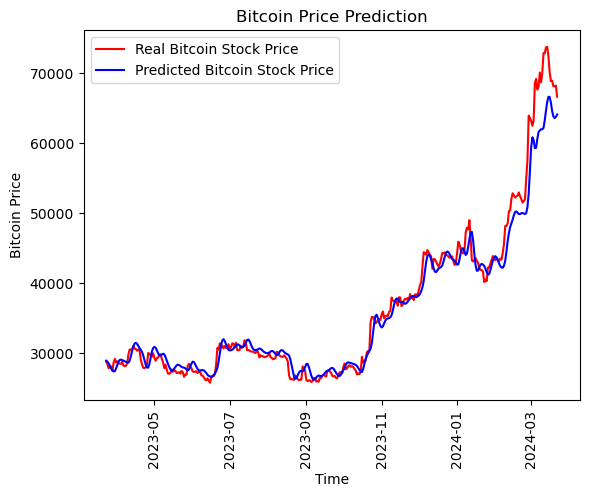

In [13]:
plt.plot(df.loc[n:, 'Date'],dataset_test.values, color = 'red', label = 'Real Bitcoin Stock Price')
plt.plot(df.loc[n:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted Bitcoin Stock Price')

plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Bitcoin Price')
plt.legend()
plt.xticks(rotation=90)
plt.show()

In [14]:
# tomorrow's predicted price
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date
0,4028.514648,4053.906738,4021.542480,4023.968262,9252935969,0.0,0.0,2019-03-22 00:00:00+00:00
1,4022.713379,4049.882568,4015.964600,4035.826416,9578850549,0.0,0.0,2019-03-23 00:00:00+00:00
2,4035.163574,4040.699707,4006.192871,4022.168213,9144851065,0.0,0.0,2019-03-24 00:00:00+00:00
3,4024.112793,4038.840820,3934.031250,3963.070557,10359818883,0.0,0.0,2019-03-25 00:00:00+00:00
4,3969.228760,3985.080811,3944.753174,3985.080811,10707678815,0.0,0.0,2019-03-26 00:00:00+00:00
...,...,...,...,...,...,...,...,...
1823,68371.304688,68897.132812,66594.226562,67548.593750,49261579492,0.0,0.0,2024-03-18 00:00:00+00:00
1824,67556.132812,68106.929688,61536.179688,61912.773438,74215844794,0.0,0.0,2024-03-19 00:00:00+00:00
1825,61930.156250,68115.257812,60807.785156,67913.671875,66792634382,0.0,0.0,2024-03-20 00:00:00+00:00
1826,67911.585938,68199.992188,64580.917969,65491.390625,44480350565,0.0,0.0,2024-03-21 00:00:00+00:00


In [15]:
## Add a dummy row at the end. This will not be used to predict. 

df.loc[len(df)]=df.loc[len(df)-1]
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date
0,4028.514648,4053.906738,4021.542480,4023.968262,9252935969,0.0,0.0,2019-03-22 00:00:00+00:00
1,4022.713379,4049.882568,4015.964600,4035.826416,9578850549,0.0,0.0,2019-03-23 00:00:00+00:00
2,4035.163574,4040.699707,4006.192871,4022.168213,9144851065,0.0,0.0,2019-03-24 00:00:00+00:00
3,4024.112793,4038.840820,3934.031250,3963.070557,10359818883,0.0,0.0,2019-03-25 00:00:00+00:00
4,3969.228760,3985.080811,3944.753174,3985.080811,10707678815,0.0,0.0,2019-03-26 00:00:00+00:00
...,...,...,...,...,...,...,...,...
1824,67556.132812,68106.929688,61536.179688,61912.773438,74215844794,0.0,0.0,2024-03-19 00:00:00+00:00
1825,61930.156250,68115.257812,60807.785156,67913.671875,66792634382,0.0,0.0,2024-03-20 00:00:00+00:00
1826,67911.585938,68199.992188,64580.917969,65491.390625,44480350565,0.0,0.0,2024-03-21 00:00:00+00:00
1827,65492.078125,66613.671875,62725.214844,63736.804688,42614337536,0.0,0.0,2024-03-22 00:00:00+00:00


In [16]:
# Getting the predicted stock price

dataset_train = df.iloc[:n, 1:2]
dataset_test = df.iloc[n:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - d:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [17]:
X_test = []
for i in range(d, inputs.shape[0]):
    X_test.append(inputs[i-d:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(367, 30, 1)


In [18]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
float(predicted_stock_price[-1])

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


63942.5234375

In [19]:
print("Tomorrow's predicted price = $", float(predicted_stock_price[-1]))

Tomorrow's predicted price = $ 63942.5234375
